In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import random

**Task1**

In [ ]:
def obj_func(X):
  result = 1.10471 * X[0]*X[0] * X[1] + 0.04811 * X[2] * X[3] * (14 + X[1])
  return result

In [ ]:
def t_prime (X):
  result = 6000 / (math.sqrt(2) * X[0] * X[1])
  return result

In [ ]:
def t_2_prime (X):
  result = (6000 * (14 + 0.5 * X[1]) * math.sqrt(0.25 * (X[1]*X[1] + (X[0] + X[2])*(X[0] + X[2])))) / (2 * (0.707 * X[0] * X[1] * ((X[1] * X[1] / 12) + 0.25 * (X[0] + X[2]) * (X[0] + X[2]))))
  return result

In [ ]:
def t(X):
  result = math.sqrt((t_prime(X)*t_prime(X) + t_2_prime(X)*t_2_prime(X)) + ((X[1] * t_prime(X) * t_2_prime(X)) / math.sqrt(0.25 * (X[1]*X[1] + (X[0] + X[2])*(X[0] + X[2])))))
  return result

In [ ]:
def sigma(X):
  result = 504000 / (X[2]*X[2] * X[3])
  return result

In [ ]:
def Pc(X):
  result = 64746.022 * (1 - 0.0282346 * X[2]) * X[2] * X[3]*X[3] * X[3]
  return result

In [ ]:
def g1(X):
  result = 13600 - t(X)
  return result

def g2(X):
  result = 30000 - sigma(X)
  return result

def g3(X):
  result = X[3] - X[0]
  return result

def g4(X):
  result = Pc(X) - 6000
  return result


In [ ]:
X = np.array([1.05, 3.15, 4.43, 7.87])
print(obj_func(X))
print(g1(X))
print(g2(X))
print(g3(X))
print(g4(X))

11.560409903271651
-9335.460447699355
11409.7214078158
4.64638917
22985909.255106594


**Task2 RS**

In [ ]:
def RS(func, max_iter, lower_bound, upper_bound, fargs=()):
  points = np.random.uniform(low = lower_bound, high = upper_bound, size = (max_iter, len(lower_bound))) 
  results = np.array([func(point) for point in points])
  best_index = np.argmin(results)
  return points[best_index], results[best_index]

In [ ]:
#parameters
number_of_samples = 10000
lower_bound = np.array([0.125, 0.125, 0.1, 0.1])
upper_bound = np.array([5, 5, 10, 10])
result = RS(obj_func, number_of_samples, lower_bound, upper_bound, fargs=()) #just getting first result of RS but this is not best answer since in those points g functions are negative
print(result)

(array([0.5744016 , 0.44976559, 0.73935844, 0.10605982]), 0.21844602465070553)


**Minimum value of obj function in feasible space**

In [ ]:
#meeting all the given inequalities to find min of obj_func in feasible space
def const_handling(obj_func,g1,g2,g3,g4,lower_bound,upper_bound,max_iter):
  results = []
  feasible_space = []
  points = np.random.uniform(low = lower_bound, high = upper_bound, size = (max_iter, len(lower_bound)))
  for point in points:
    if g1(point) >=0 and g2(point) >=0 and g3(point) >=0 and g4(point) >=0:
      results.append(obj_func(point))
      feasible_space.append(point)
  min = results[0]
  for i in range(len(results)):
    if results[i] < min:
      min = results[i]
      j = i
  return(feasible_space[j], min)
print(const_handling(obj_func,g1,g2,g3,g4,lower_bound,upper_bound,number_of_samples))

(array([0.41112891, 4.0294402 , 7.75842239, 0.55880708]), 4.51296386673174)


**Task3 SA**

In [ ]:
def SA(func, low_bound, high_bound, max_iter, step_size, temp):
  points = np.random.uniform(low = low_bound, high = high_bound, size = (max_iter, len(low_bound)))
  for point in points:
    if g1(point) >=0 and g2(point) >=0 and g3(point) >=0 and g4(point) >=0:
      x_best = point
      y_best = func(x_best)
      break
  x_c = x_best
  y_c = y_best
  for i in range(max_iter):
    x_prime = x_c + randn(len(low_bound)) * step_size
    y_prime = func(x_prime)
    if y_prime < y_c or random.uniform(0,1) < min(math.exp(-(y_prime-y_c)/(temp/float(i+1))),1):
      x_c = x_prime
      y_c = y_prime
    if y_prime < y_best:
      x_best = x_prime
      y_best = y_prime
  return x_best, y_best

In [ ]:
print(SA(obj_func, lower_bound, upper_bound, number_of_samples, 0.1, 20))

(array([1.43567873, 2.09120044, 8.23713215, 4.45813191]), 33.19008283535066)


**Task4 evaluation**

In [ ]:
RS_results = np.array([const_handling(obj_func,g1,g2,g3,g4,lower_bound,upper_bound,number_of_samples) for i in range(22)])
SA_results = np.array([SA(obj_func,lower_bound, upper_bound, number_of_samples, 0.1, 20) for i in range(22)])

<ipython-input-85-90b2b25addac>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  RS_results = np.array([const_handling(obj_func,g1,g2,g3,g4,lower_bound,upper_bound,number_of_samples) for i in range(22)])
<ipython-input-85-90b2b25addac>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SA_results = np.array([SA(obj_func,lower_bound, upper_bound, number_of_samples, 0.1, 20) for i in range(22)])


In [ ]:
Ran_Search = []
Sim_annealing = []
for i in range(22):
  Ran_Search.append(RS_results[i][1])
  Sim_annealing.append(SA_results[i][1])

In [ ]:
print(Ran_Search)
print(Sim_annealing)

[3.3627274341199946, 5.135889110181527, 5.517884452665209, 4.333907305770946, 5.264066490429249, 5.311676302340621, 5.415318188735214, 3.6580061424437353, 5.1096368702909505, 4.940269091799346, 4.8124757302802115, 5.205101785116952, 3.812564180035358, 4.620805852379796, 3.8153606925230132, 3.7269531337623647, 4.797024469638818, 3.9031732308719205, 4.160135493402769, 2.95519871939125, 4.493894388551976, 3.90844397242443]
[-29911538.77892818, -640743.6525332007, -27854422.107292477, -587068.45288344, -591566.330462703, -610298.8777802998, -27902339.683285125, -594019.5261448193, -25901365.046002526, -647911.3888673605, -606773.24712641, -567889.0593838274, -635514.9675163543, -28512591.218329262, -27085555.454482578, -572953.9187878764, -26618485.47650021, -608287.6331458943, -555280.3751659147, -24310589.32625295, -25802558.452584416, -27193863.29957189]


Text(0, 0.5, 'Best Objective Value')

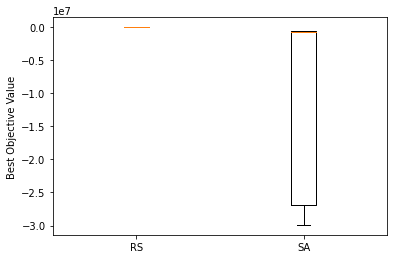

In [ ]:
plt.boxplot([Ran_Search, Sim_annealing])
plt.xticks([1,2], ['RS', 'SA'])
plt.ylabel("Best Objective Value")